# AS-AD model with floating exchange regime


**THE COMPLETE MODEL**

In this Data Project we simulate an AS-AD model with floating exchange regime. 

<em> Model inpsiration comes from "Introducing Advanced Macroeconomics - Growth and Business Cycles 2022"<em>

$$
\begin{align*}
AS:\pi_t&=\pi^e+\gamma(y_t-\bar{y})+s_t \\
AD: \pi_t&=\frac{\beta_1}{\hat{\beta_1}}e^r_{t-1}+\pi^e-\frac{1}{\hat{\beta_1}}(y_t-\bar{y})+\frac{1}{\hat{\beta_1}}z_t \\
RERD:  e^r_t&=e^r_{t-1}+\left(1+\frac{h}{\theta}\right)(\pi^f-\pi_t) \\
\pi^e &= \pi^f \\
\hat{\beta_1}&=\beta_1+\frac{h\beta_1}{\theta}+h\beta_2 \\
z_t&=\delta z_{t-1}+x_t, x_t \sim N(0,\sigma_x^2) \\
s_t&=\omega s_{t-1}+c_t, c_t \sim N(0,\sigma_c^2) \\
\end{align*}
$$

Where $\pi_t$ is inflation, $\pi^f$ is inflation abroad, $\pi^e$ is expectations to inflation, $y_t$ is output, $\bar{y}$ is structural output, $e^r_t$ is the real exchange, $z_t$ is demand-shock, $s_t$ is supply-shock, $h$ describes at what degree the centralbank wants to minimize deviations in inflation, $\theta$ is adjustment speed in nominal exchange rate expectations, when the nominal exchange rate deviates from the structural level, $\bar{e}$.

Following some tideous algebra, the model can be solved to:

$$
\begin{align*}
\hat{y}_{t} &= \frac{1}{1+\hat{\beta}_{1}\gamma}\left[\beta_1e^r_{t-1}-\hat{\beta}_1\omega s_{t-1}-\hat{\beta}_1 c_t+\delta z_{t-1}+x_t\right] \\
\hat{\pi}_{t} &= \frac{\gamma}{1+\hat{\beta}_{1}\gamma}\left[\beta_1e^r_{t-1}-\hat{\beta}_1\omega s_{t-1}-\hat{\beta}_1 c_t+\delta z_{t-1}+x_t\right]+\omega s_{t-1}+c_t \\
e^r_{t} &= e^r_{t-1}-\left(1+\frac{h}{\theta}\right)\hat{\pi}_t
\end{align*}
$$

Where we have used the following definitions of gaps, $\hat{y_t}=y_t-\bar{y}$ and $\hat{\pi_t}=\pi_t-\pi^f$.

The parameters of the model are:
$\gamma, \beta_1, \delta, \omega, \sigma^2_x, \sigma^2_c, \beta_2, h, \theta$.

Importing packages:

In [1]:
%load_ext autoreload
%autoreload 2

from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

We import empirical evidence for Sweden. The empiricial evidence has been imported from Jordá-Schularick-Taylor Macrohistory Database. We observe data from 1994 to 2020, since Sweden adopted a floating exchange regime in 1993.

Note 1: To determine $\hat{\pi}_t$, we've assumed that $\pi^f=\pi^{\star}=2\%$ 

Note 2: To determine $\hat{y}_t$, we've used the HP-filter with $\lambda=100$

We use the pandas module to import data, and calculate empirical moments:

In [2]:
# Loading the CSV into a DataFrame
data = pd.read_csv('EmpiricalData.csv')

# Setting the index of the DataFrame to the Year column
data.set_index('Year', inplace=True)

# Calculating standard deviation of output- and inflationsgap
output_std = np.std(data['Outputgap'])
inflation_std = np.std(data['Inflationsgap'])

# Calculating correlation coefficient between output- and inflationsgap
output_inflation_corr = data['Outputgap'].corr(data['Inflationsgap'])

# Lagging the two time series by 1 period, to calculate the ACF
lagged_output = data['Outputgap'].shift(1)
lagged_inflation = data['Inflationsgap'].shift(1)

# Calculating the ACF for output- and inflationsgap
output_corr = data['Outputgap'].corr(lagged_output)
inflation_corr = data['Inflationsgap'].corr(lagged_inflation)

Presenting output- and inflationsgap in a diagram:

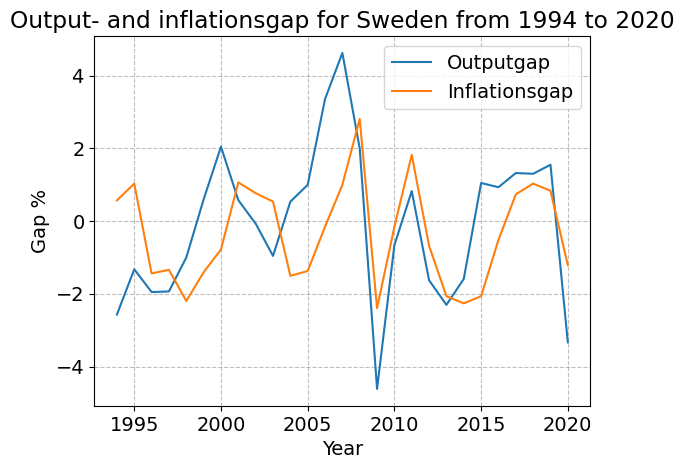

In [3]:
# Plotting the two columns
plt.plot(data.index, data['Outputgap'], label='Outputgap')
plt.plot(data.index, data['Inflationsgap'], label='Inflationsgap')

# Adding a legend, title and axis labels
plt.legend()
plt.title('Output- and inflationsgap for Sweden from 1994 to 2020')
plt.xlabel('Year')
plt.ylabel('Gap %')

# Displaying the plot
plt.show()

Presenting the empirical moments in a table:

In [4]:
# Creating a dictionary to display
values = {
    'std: Outputgap': output_std,
    'std:: Inflationsgap': inflation_std,
    'corr: Output- and inflationsgap': output_inflation_corr,
    'ACF: Outputgap': output_corr,
    'ACF: Inflationsgap': inflation_corr
}

# Define the maximum length of the label
label_width = max(len(key) for key in values.keys())

# Define the format string for each row
row_format = f"| {{:<{label_width}}} | {{:>10.4f}} |"

# Print the header
print(f"+{'-'*(label_width+2)}+{'-'*12}+")
print(f"| {'Data-moment':<{label_width}} | {'Result':>10} |")
print(f"+{'-'*(label_width+2)}+{'-'*12}+")

# Print each row
for key, value in values.items():
    print(row_format.format(key, value))

# Print the footer
print(f"+{'-'*(label_width+2)}+{'-'*12}+")

+---------------------------------+------------+
| Data-moment                     |     Result |
+---------------------------------+------------+
| std: Outputgap                  |     2.0392 |
| std:: Inflationsgap             |     1.3841 |
| corr: Output- and inflationsgap |     0.4757 |
| ACF: Outputgap                  |     0.3873 |
| ACF: Inflationsgap              |     0.2701 |
+---------------------------------+------------+


We have created the model in dataproject.py. We import and simulate the model:

In [5]:
# Importing the model, FlydendeValuta
from dataproject import FlydendeValuta 

# Defining the model in the Notebook
model = FlydendeValuta()
par = model.par
sim = model.sim

# Simulating the model for t = 10.000
model.simulate()

Plotting the results from the simulation:

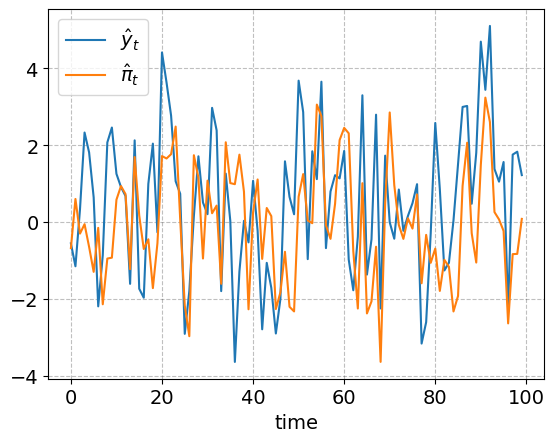

In [13]:
simT_fig = 100 # first 100 periods
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(simT_fig),sim.y_hat[:simT_fig],label='$\\hat{y}_t$')
ax.plot(np.arange(simT_fig),sim.pi_hat[:simT_fig],label='$\\hat{\pi}_t$')
ax.set_xlabel('time')
ax.legend(frameon=True);

Comparing the empirical data-moments with the simulation:

In [7]:
model.calc_moms() # calculate moments from the simulation
error = model.calc_diff_to_data(do_print=True) # compares with the data

std_y       | data = 2.0392, model = 1.8493
std_pi      | data = 1.3841, model = 1.0547
corr_y_pi   | data = 0.4757, model = 0.1698
autocorr_y  | data = 0.3873, model = 0.6046
autocorr_pi | data = 0.2701, model = 0.3964
error =   0.30129285


Above comparison shows, that the model differs with the empirical evidence. The model above was simulated with guesses of the parameters. We want to find a set of parameters, so the model fits 1:1 with the empirical evidence. We construct the following object-function:
$$
\begin{align*}
g(\gamma,\beta_1,\delta,\omega,\sigma^2_x,\sigma^2_c,\beta_2,h,\theta) = &\,\,(std(\hat{y}_t^{data}) - std(\hat{y}_t^{model}))^2 + \\
&  (std({\hat{\pi}}_t^{data}) - std({\hat{\pi}}_t^{model}))^2 + \\
&  (corr({\hat{y}}_t^{data},{\hat{\pi}}_t^{data}) - corr({\hat{y}}_t^{model},{\hat{\pi}}_t^{model}))^2 + \\
&  (corr({\hat{y}}_t^{data},{\hat{y}}_{t-1}^{data}) - corr({\hat{y}}_t^{model},{\hat{y}}_{t-1}^{model}))^2 + \\
&  (corr({\hat{\pi}}_t^{data},{\hat{\pi}}_{t-1}^{data}) - corr({\hat{\pi}}_t^{model},{\hat{\pi}}_{t-1}^{model}))^2 \\
\end{align*}
$$

The goal is to minimize the deviation in the data-moments between the simulation and the empirical evidence, i.e.:

$$
\min_{\gamma,\beta_1,\delta,\omega,\sigma^2_x,\sigma^2_c,\beta_2,h,\theta} g(\gamma,\beta_1,\delta,\omega,\sigma^2_x,\sigma^2_c,\beta_2,h,\theta)
$$
Under the restrictions:
$$
\delta,\omega\in[0,1] \\
\gamma,\beta_1,\sigma^2_x,\sigma^2_c,\beta_2,h,\theta>0
$$
Creating the object-function:

In [8]:
def obj(x,parnames,do_print=False):
    """ objective for choosing parameters """

    # a. update parameters
    for xval,parname in zip(x,parnames):
        par.__dict__[parname] = xval
        if do_print: print(f'{parname:10s} = {xval:.4f}')

    if do_print: print('')

    model.calc_compound_par()

    # b. simulate and calculate moments
    model.simulate()
    model.calc_moms()

    # c. compare with data
    error = model.calc_diff_to_data(do_print=do_print)

    return error

Calculating the objective at the initial guesses of the parameters:

In [9]:
parnames = ['delta','omega','gamma','beta1','sigma_x','sigma_c','beta2','h','theta']
x0 = [par.__dict__[parname] for parname in parnames]
error_ = obj(x0,parnames,do_print=True)

delta      = 0.2000
omega      = 0.5500
gamma      = 0.3600
beta1      = 0.3000
sigma_x    = 1.3500
sigma_c    = 0.9600
beta2      = 0.1000
h          = 0.5000
theta      = 2.0000

std_y       | data = 2.0392, model = 1.8493
std_pi      | data = 1.3841, model = 1.0547
corr_y_pi   | data = 0.4757, model = 0.1698
autocorr_y  | data = 0.3873, model = 0.6046
autocorr_pi | data = 0.2701, model = 0.3964
error =   0.30129285


Using Nelder-Mead Optimization to solve the minimization problem:

In [10]:
bounds = ((0,1),(0,1),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None))
res = optimize.minimize(obj,x0,bounds=bounds,method='Nelder-Mead',args=(parnames,))

Ensuring the optimization was succesful:

In [11]:
assert res.success

Printing the results from the optimization:

In [12]:
error_ = obj(res.x,parnames,do_print=True)

delta      = 0.2615
omega      = 0.4467
gamma      = 0.5091
beta1      = 0.2435
sigma_x    = 1.9563
sigma_c    = 1.1433
beta2      = 0.0910
h          = 0.3986
theta      = 1.1990

std_y       | data = 2.0392, model = 2.0392
std_pi      | data = 1.3841, model = 1.3841
corr_y_pi   | data = 0.4757, model = 0.4757
autocorr_y  | data = 0.3873, model = 0.3873
autocorr_pi | data = 0.2701, model = 0.2701
error =   0.00000000


The model has now been optimized, and the parameters have been chosen accordingly.